In [1]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
import time
from IPython import display
from IPython.html import widgets
plt.style.use('ggplot')



import numpy as np
import scipy as sp
import torch
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'white'


import sys
sys.path.append('conditional_gan/')

import datetime
import warnings


/home/ashray/anaconda3/envs/py37torch1/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


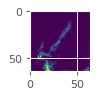

In [2]:
#!/usr/bin/env python
# coding: utf-8



# In[2]:


warnings.filterwarnings('ignore')


# In[3]:


import torch.utils.data
import os.path
import random
import torchvision.transforms as transforms
import numpy as np
from numpy import inf
import matplotlib.gridspec as gridspec
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib.pyplot import figure


# In[4]:


test_data_input = dict(np.load('datasets/livneh/testA.npz'))
test_data_ouput = dict(np.load('datasets/livneh/testB.npz'))


# In[5]:


starting_day = datetime.date(1900, 1, 1) + datetime.timedelta(days = 37620 + 4018 - 804)


# In[6]:


starting_day


# In[7]:


model_path = "conditional_gan/SavedModels/latest"


# In[8]:


test_data_input.keys()


# In[9]:


test_data_input['data'].shape


# In[10]:


test_data_ouput['data'].shape


# In[11]:


data_A = test_data_input['data']
data_B = test_data_ouput['data']


# In[ ]:





# In[12]:


def take_two_weeks(input_data, start_date):
    return input_data[start_date:start_date + 14, :, :, :]


# In[13]:


take_two_weeks(test_data_ouput['data'], 10).shape


# In[14]:


from networks import define_G


# In[15]:


model = define_G(6, 1, 32, 'instance', 'resnet', False, [0])
model


# In[16]:


model.load_state_dict(torch.load(model_path)['netG_A_B'])
model.eval()


# In[17]:


torch.histc(torch.from_numpy(test_data_ouput['data'][1,:,:,:]))


# In[ ]:





# In[18]:


#plt.imshow(model(torch.from_numpy(arr_to_input(data_A[150:151, :, :, :])).cuda()).cpu().detach().numpy()[0,0,:,:])


# In[19]:


figure(num=None, figsize=(1, 1), dpi=80, facecolor='w', edgecolor='k')


# In[20]:


#normalizing data
def arr_to_input(arr):
    arr = np.nan_to_num(arr)
    if arr.ndim == 3:
        arr = np.expand_dims(arr, axis=2)
    means = np.nanmean(arr, axis=(0,1,2))
    # scale and shift to [-1,1]
    arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
    arr[np.isnan(arr)] = -1; arr[arr == inf] = -1; arr[arr == -inf] = -1
    if 64 is not None:
        new_arr = []
        #print "Resizing data to %d" % 64
        for x in arr:
            new_arr.append(resize(x, (64,64)))
        arr = np.stack(new_arr)
    # convert data from b,0,1,c to b,c,0,1
    arr = np.transpose(arr, (0,3,1,2))
    
    return arr.astype('float32')


# In[21]:


temp = arr_to_input(data_A[150:151,:,:,:])


# In[22]:


temp[0,1].shape


# In[23]:


temp1 = np.concatenate((temp[0,0], temp[0,1], temp[0,2]))


# In[24]:


temp2 = np.concatenate((temp[0,3], temp[0,4], temp[0,5]))


# In[25]:


plt.imshow(np.concatenate((temp1, temp2), axis = 1))


# In[26]:


temp = arr_to_input(data_B[150:151,:,:,:])


# In[27]:


temp.shape


# In[28]:


plt.imshow(temp[0,0, :,:])


# In[ ]:


def give_data_seq(inputA, inputB, start_date):
    fake_B = model(torch.from_numpy(arr_to_input(take_two_weeks(inputA, start_date))[:,:,:,:]).cuda()).cpu()
    real_B = torch.from_numpy(arr_to_input(take_two_weeks(inputB, start_date)))
    return fake_B, real_B




mask = np.load("OceanMask.npy")
mask = resize(mask.astype(np.float), (64,64))
mask[mask == 1] = np.nan
mask = mask + 1




    
    


# In[47]:


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)






In [3]:
warnings.filterwarnings('ignore')

In [4]:
im1 = np.nan_to_num(np.load('datasets/livneh/trainB/0.npz')['data'])
im2 = np.nan_to_num(np.load('datasets/livneh/trainB/150.npz')['data'])

In [5]:
im1 = im1 / np.max(im1)
im2 = im2 / np.max(im2)

In [6]:
print("hi")

hi


In [7]:
#lets try and implement some of this stuff

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


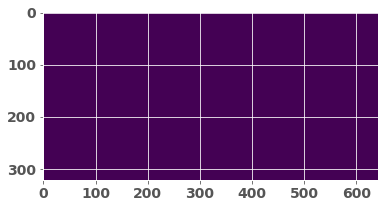

In [8]:
plt.imshow(np.concatenate((np.zeros(im1[:,:,0].shape), np.zeros(im1[:,:,0].shape)), axis=1))

In [9]:
def im_corr(im1, im2):
    #return circular correlation of images 1 and 2:
    if im1.shape != im2.shape:
        print("arrays need to have same shape")
        return None
    corrmat = np.zeros(im1.shape)    
    top = np.concatenate((np.zeros(im2.shape), np.zeros(im2.shape)), axis=1)
    bottom = np.concatenate((im2, np.zeros(im2.shape)), axis = 1)
    
    shiftmat = np.concatenate((top, bottom))
    
    
    corrmat = sp.signal.convolve(im1, shiftmat, 'same')
    return (corrmat - np.min(corrmat))/(np.max(corrmat) - np.min(corrmat))

In [10]:
def im_circcorr(im1, im2):
    #return circular correlation of images 1 and 2:
    if im1.shape != im2.shape:
        print("arrays need to have same shape")
        return None
    corrmat = np.zeros(im1.shape)
    shiftmat = np.tile(im2, (2,2))
    
    corrmat = sp.signal.convolve(im1, shiftmat, 'same')
    return corrmat/np.max(corrmat)

In [11]:


top = np.concatenate((np.zeros(im2.shape), np.zeros(im2.shape)), axis=1)
bottom = np.concatenate((im1, np.zeros(im2.shape)), axis = 1)
    
shiftmat = np.concatenate((top, bottom))

sp.signal.fftconvolve(im1, shiftmat, 'same').shape


(321, 321, 1)

In [12]:
two_point_corr = im_corr(im1, im1)

In [13]:
sp.signal.convolve2d(im1, im1, 'same')

ValueError: convolve2d inputs must both be 2D arrays

TypeError: Invalid shape (321, 321, 1) for image data

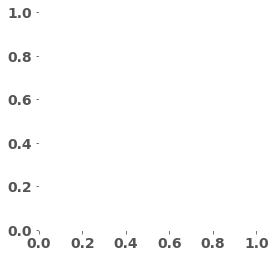

In [14]:
plt.imshow(sp.signal.fftconvolve(im1, shiftmat, 'same')/np.max(sp.signal.fftconvolve(im1, shiftmat, 'same')))

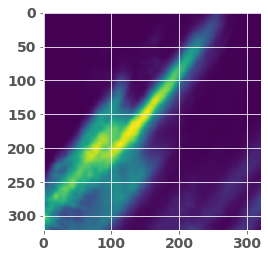

In [15]:
plt.imshow(sp.signal.convolve(im1, im1, 'same')[:,:,0])

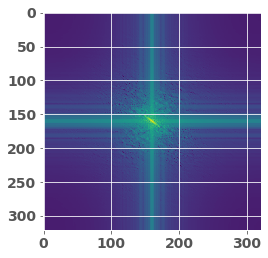

In [16]:
psd=np.log10(abs(np.fft.fftshift(np.fft.fft2(sp.signal.convolve(im1, im1, 'same')[:,:,0]))))*20;
plt.imshow(psd)

In [ ]:
psd1=np.log10(abs(np.fft.fft2(im1[:,:,0])))*20
plt.imshow(psd1)


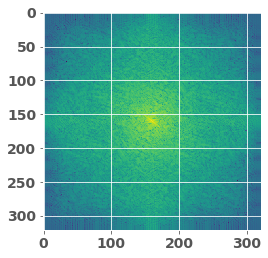

In [17]:
psd1=np.log10(abs(np.fft.fftshift(np.fft.fft2(im1[:,:,0]))))*20
plt.imshow(psd1)


In [ ]:
psd2=np.log10(abs(np.fft.fft2(im2[:,:,0])))*20
plt.imshow(psd2)

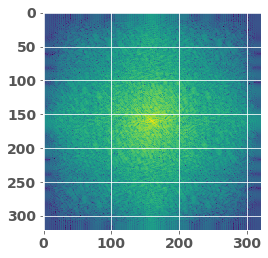

In [18]:
psd2=np.log10(abs(np.fft.fftshift(np.fft.fft2(im2[:,:,0]))))*20
plt.imshow(psd2)

In [ ]:
#radial averaging of PSD around center

In [19]:
x,y = np.meshgrid(np.arange(im1.shape[1]),np.arange(im1.shape[0]))
center = (im1.shape[0]//2, im2.shape[0]//2)
x -= center[0]
y -= center[1]

226.27416997969522


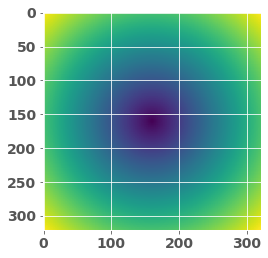

In [20]:
R = np.sqrt(x**2 + y**2)
plt.imshow(R)
print(np.max(R))

In [ ]:
distances = np.linspace(0, 228, 228)

In [21]:
def take_radial_slice_mean(image, radius, distances):
    #print(image[(distances >= radius-.5) & (distances < radius+.5)])
    #print(((distances >= radius-.5) & (distances < radius+.5)))
    return image[(distances >= radius-.5) & (distances  < radius+.5)].mean()

In [22]:
R

array([[226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       ...,
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998]])

(160, 160)


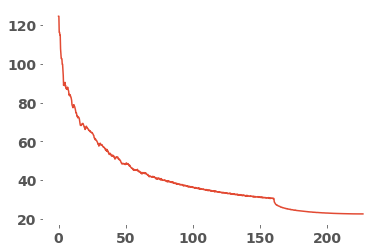

In [23]:


midpoint = (im1.shape[0]//2, im2.shape[0]//2)
print(midpoint)
r  = np.linspace(0,228,num=228*4)
means = []
# plot it
for dist in r:
    #print(dist)
    means.append(take_radial_slice_mean(psd, dist, R))
    
fig,ax=plt.subplots()
ax.plot(r,means)


In [24]:
def power_spectral_density(im):
    #print(im.shape)
    temp = (im - np.mean(im))/np.var(im)
    psd = np.log10(abs(np.fft.fftshift(np.fft.fft2(im_corr(temp, temp)))))*20
    x,y = np.meshgrid(np.arange(im.shape[1]),np.arange(im.shape[1]))
    center = (im.shape[0]//2, im.shape[1]//2)
    x -= center[0]
    y -= center[1]
    R = np.sqrt(x**2 + y**2)
    r  = np.linspace(0,int(np.max(x)),num=int(np.max(x))*4)
    means = []
    # plot it
    for dist in r:
        #print(dist)
        means.append(take_radial_slice_mean(psd, dist, R))
    return means

In [25]:
R

array([[226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       ...,
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998]])

In [26]:
def take_n_samples_random(data, n):
    image_indices = np.random.choice(804, n)
    return data[image_indices, :,:, :]

In [27]:
def give_data_random(inputA, inputB, num_days):
    fake_B = model(torch.from_numpy(arr_to_input(take_n_samples_random(inputA, num_days))[:,:,:,:]).cuda()).cpu()
    real_B = torch.from_numpy(arr_to_input(take_n_samples_random(inputB, num_days)))
    return fake_B, real_B


In [28]:
def give_data_sequential(inputA, inputB, start_day, num_days):
    fake_B = model(torch.from_numpy(arr_to_input(inputA[start_day:start_day+num_days,:,:,:])).cuda()).cpu()
    real_B = torch.from_numpy(arr_to_input(inputB[start_day:start_day+num_days,:,:,:]))
    return fake_B, real_B


In [29]:
fake_summer, real_summer = give_data_sequential(data_A, data_B, 250, 100)



In [30]:
fake_winter, real_winter = give_data_sequential(data_A, data_B, 365, 100)

In [31]:
fake_spring, real_spring = give_data_sequential(data_A, data_B, 480, 100)

In [34]:
fake, real = give_data_random(data_A, data_B, 400)

In [35]:


plt.plot(np.mean(means_fake, axis = 0))
plt.plot(np.max(means_fake, axis = 0))
plt.plot(np.min(means_fake, axis=  0))

NameError: name 'means_fake' is not defined

In [32]:
def compute_power_spectras(im_list, power):
    radial_means_list = []
    for index in range(0, im_list.shape[0]):
        if index % 100 == 0: 
            print(index)
        if power:
            radial_means_list.append(power_spectral_density(im_list[index, 0, :, :].detach().numpy()))
        else:
            radial_means_list.append(energy_spectral_density(im_list[index, 0, :, :].detach().numpy()))
    return np.array(radial_means_list)


In [33]:
def plot_spectra_to_tensorboard(radial_means_real, radial_means_fake, log, writer, name, step):
    f = plt.figure(figsize=(30,20))
    f.patch.set_facecolor('white')
    
    
    psd_means_real = np.mean(radial_means_real, axis = 0)
    psd_stds_real = np.var(radial_means_real, axis = 0)**(0.5)
    
    psd_means_fake = np.mean(radial_means_fake, axis = 0)
    psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)
    
    
    x = np.linspace(0, 45.254833995939045, 180)
    y_real = psd_means_real
    error = 1.96 * psd_stds_real
    if log:
        plt.semilogx(x, y_real, 'k', color='#CC4F1B', label = 'Real')
    else:
        plt.plot(x, y_real, 'k', color='#CC4F1B', label = 'Real')
    plt.fill_between(x, y_real-error, y_real+error, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

    y_fake = psd_means_fake   
    error = 1.96 * psd_stds_fake
    if log:
        plt.semilogx(x, y_fake, 'k', color='#1B2ACC', label = 'Generated')
    else:
        plt.plot(x, y_fake, 'k', color='#1B2ACC', label = 'Generated')
    plt.fill_between(x, y_fake-error, y_fake+error, alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', linewidth=4, linestyle='dashdot', antialiased=True)

    plt.legend()
    
    plt.title("Radial Power Spectral Density of SWE Maps")
    plt.xlabel("Spatial Frequency")
    plt.ylabel("Power Spectrum")
    
    plot_to_tensorboard(writer, name, f, step)

In [34]:
radial_means_real = []
radial_means_fake = []
radial_means_real = compute_power_spectras(real_summer, True)
radial_means_fake = compute_power_spectras(fake_summer, True )

psd_means_real = np.mean(radial_means_real, axis = 0)
psd_stds_real = np.var(radial_means_real, axis = 0)**(0.5)

psd_means_fake = np.mean(radial_means_fake, axis = 0)
psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)


# 
# for i in range(0, 804):
#     if i % 100 == 0: print(i)
#     radial_means_fake.append(power_spectral_density(fake[i,0,:,:].detach().numpy()))
# radial_means_fake = np.array(radial_means_fake)

# psd_means_fake = np.mean(radial_means_fake, axis = 0)
# psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)




# plt.plot(np.arange(0, 180), psd_means_fake, 'k-')
# plt.fill_between(np.arange(0, 180), np.mean(means_real, axis = 0)-1.96*np.var(means_real, axis=  0)**(0.5) , np.mean(means_real, axis = 0) + 1.96*np.var(means_real, axis = 0)**(0.5))


0
0


NameError: name 'means_real' is not defined

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


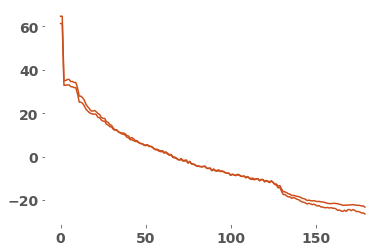

In [41]:
plt.plot(np.arange(0, 180), psd_means_real, 'k-', color='#CC4F1B')
plt.plot(np.arange(0, 180), psd_means_fake, color='#CC4F1B')
plt.fill_between(np.arange(0, 180), np.mean(means_real, axis = 0)-1.96*np.var(means_real, axis=  0)**(0.5) , np.mean(means_real, axis = 0) + 1.96*np.var(means_real, axis = 0)**(0.5))


In [35]:

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

Text(0, 0.5, 'Power Spectrum')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

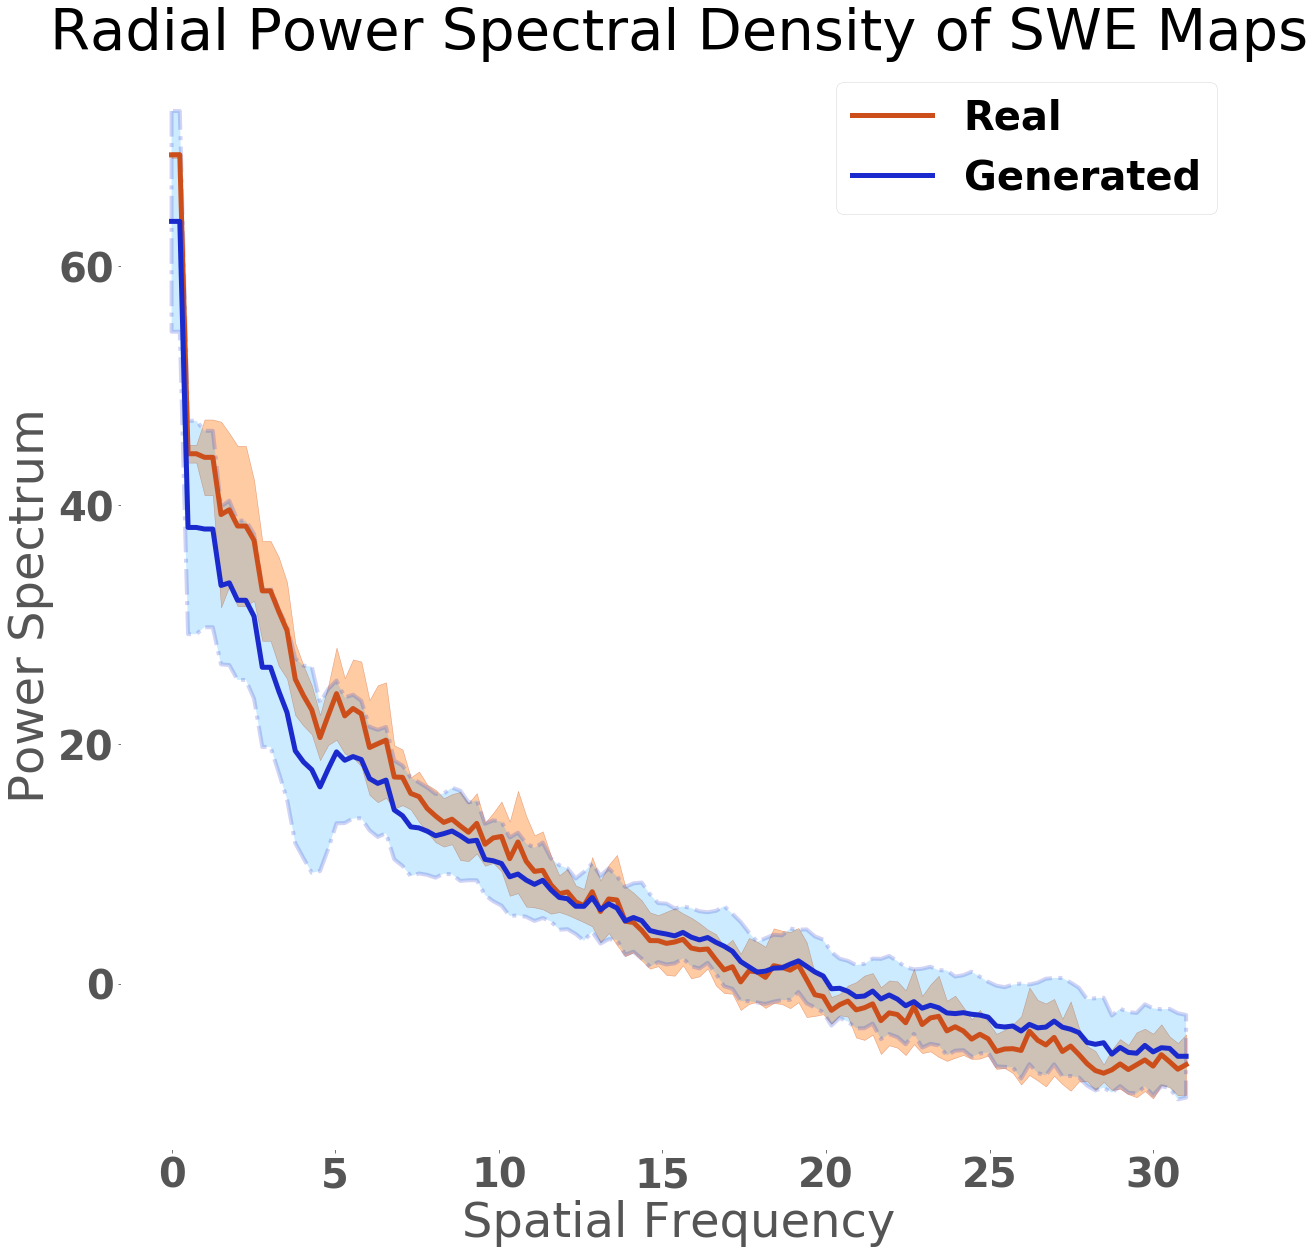

In [36]:



plt.clf()
f = plt.figure(figsize=(20, 20))
f.patch.set_facecolor('white')
x = np.linspace(0, 124/4, 124)
y = psd_means_real
error = 1.96 * psd_stds_real

plt.plot(x, y, 'k', color='#CC4F1B', label = 'Real', linewidth= 5.0)
plt.fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

y = psd_means_fake   
error = 1.96 * psd_stds_fake
plt.plot(x, y, 'k', color='#1B2ACC', label = 'Generated', linewidth= 5.0)
plt.fill_between(x, y-error, y+error,
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

plt.legend()
plt.title("Radial Power Spectral Density of SWE Maps")
plt.xlabel("Spatial Frequency")
plt.ylabel("Power Spectrum")

0
0
0
0
0
0


Text(0, 0.5, 'Power Spectrum')

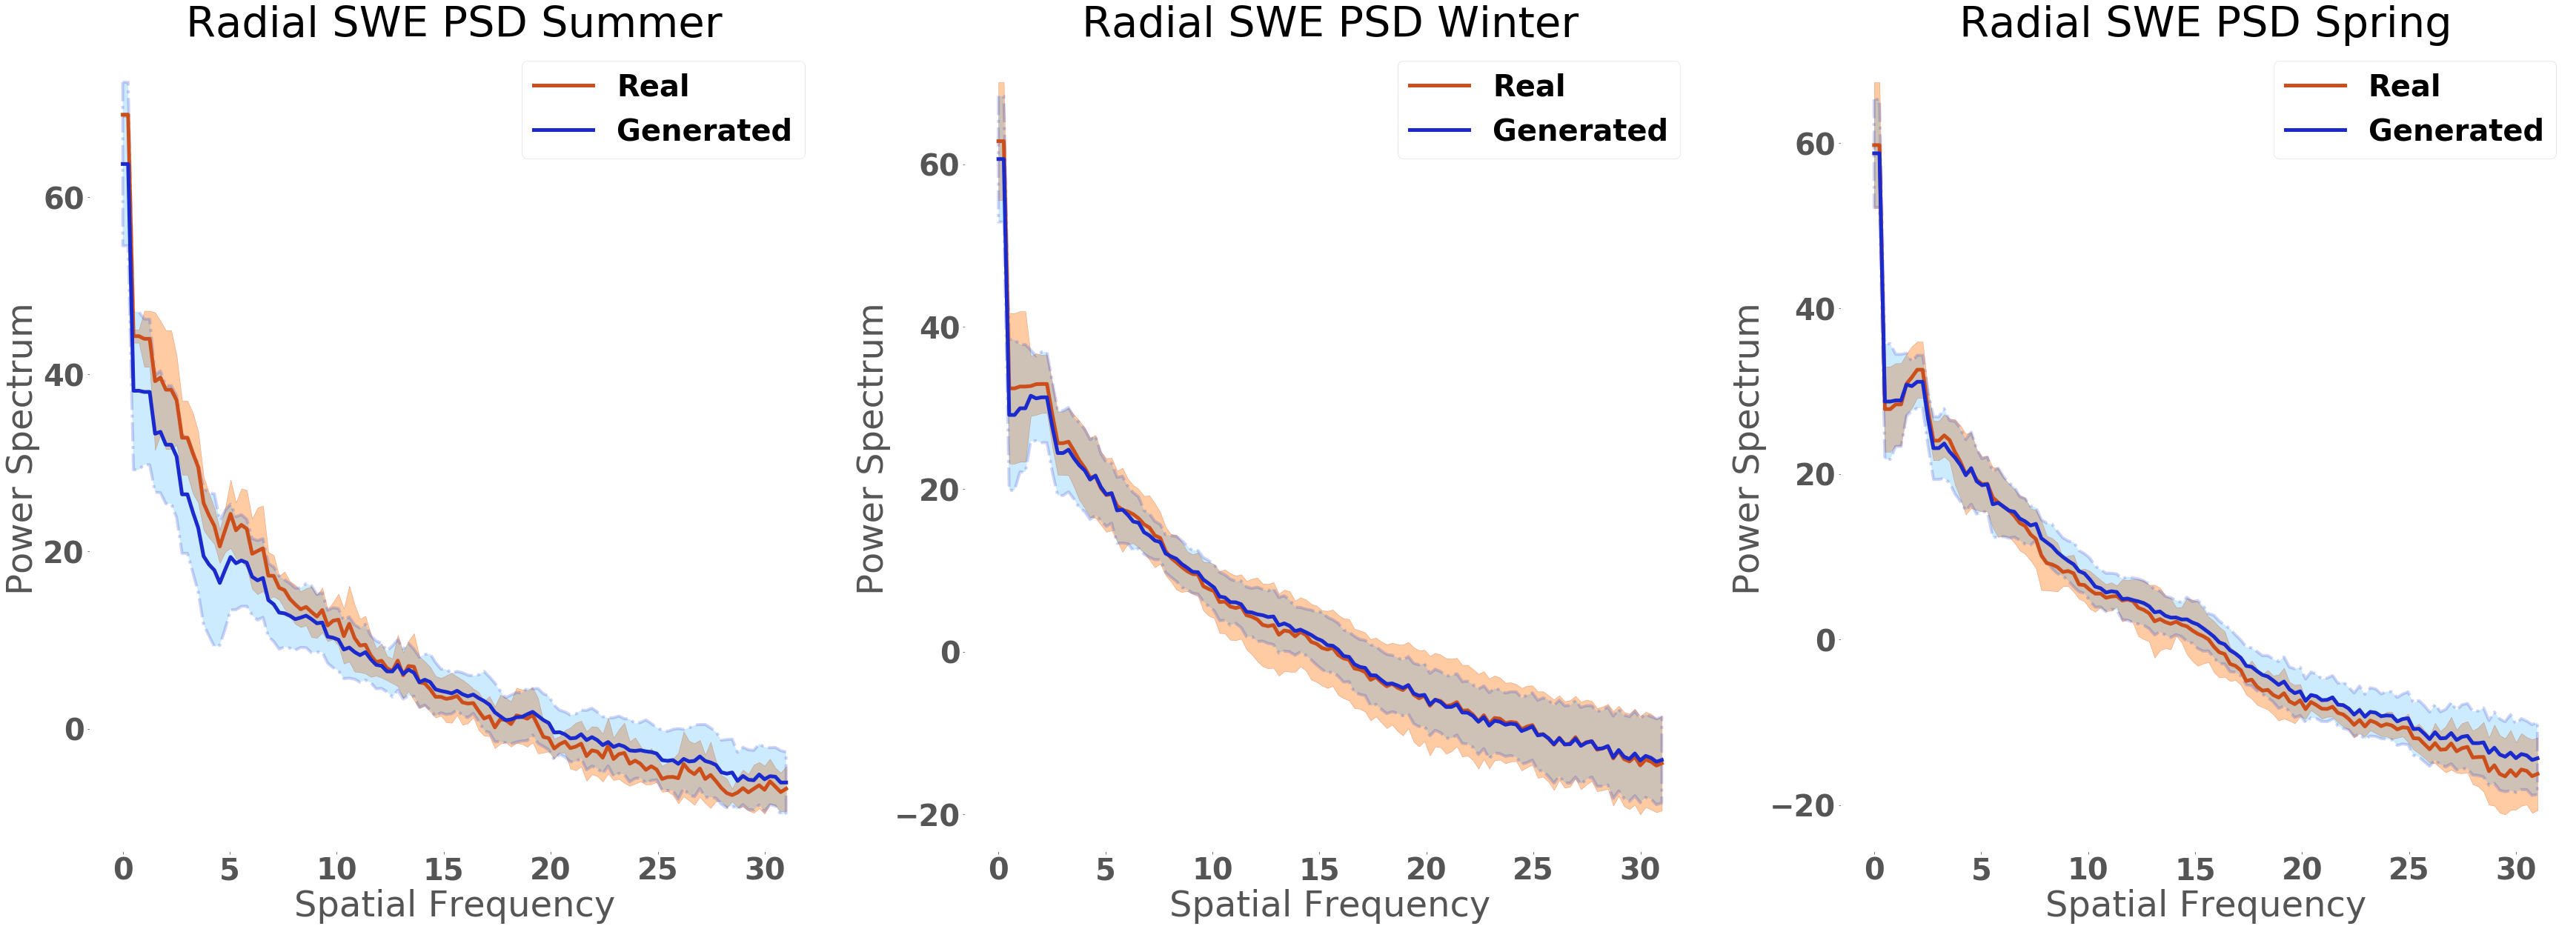

In [50]:
fig, axes = plt.subplots(1,3, figsize=(60, 20))
fig.patch.set_facecolor('white')

axes[0]
radial_means_real = []
radial_means_fake = []
radial_means_real = compute_power_spectras(real_summer, True)
radial_means_fake = compute_power_spectras(fake_summer, True )

psd_means_real = np.mean(radial_means_real, axis = 0)
psd_stds_real = np.var(radial_means_real, axis = 0)**(0.5)

psd_means_fake = np.mean(radial_means_fake, axis = 0)
psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)

x = np.linspace(0, 124/4, 124)
y = psd_means_real
error = 1.96 * psd_stds_real

axes[0].plot(x, y, 'k', color='#CC4F1B', label = 'Real', linewidth= 5.0)
axes[0].fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

y = psd_means_fake   
error = 1.96 * psd_stds_fake
axes[0].plot(x, y, 'k', color='#1B2ACC', label = 'Generated', linewidth= 5.0)
axes[0].fill_between(x, y-error, y+error,
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

axes[0].legend()
axes[0].set_title("Radial SWE PSD Summer")
axes[0].set_xlabel("Spatial Frequency")
axes[0].set_ylabel("Power Spectrum")

radial_means_real = []
radial_means_fake = []
radial_means_real = compute_power_spectras(real_winter, True)
radial_means_fake = compute_power_spectras(fake_winter, True )

psd_means_real = np.mean(radial_means_real, axis = 0)
psd_stds_real = np.var(radial_means_real, axis = 0)**(0.5)

psd_means_fake = np.mean(radial_means_fake, axis = 0)
psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)



x = np.linspace(0, 124/4, 124)
y = psd_means_real
error = 1.96 * psd_stds_real

axes[1].plot(x, y, 'k', color='#CC4F1B', label = 'Real', linewidth= 5.0)
axes[1].fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

y = psd_means_fake   
error = 1.96 * psd_stds_fake
axes[1].plot(x, y, 'k', color='#1B2ACC', label = 'Generated', linewidth= 5.0)
axes[1].fill_between(x, y-error, y+error,
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

axes[1].legend()
axes[1].set_title("Radial SWE PSD Winter")
axes[1].set_xlabel("Spatial Frequency")
axes[1].set_ylabel("Power Spectrum")


radial_means_real = []
radial_means_fake = []
radial_means_real = compute_power_spectras(real_spring, True)
radial_means_fake = compute_power_spectras(fake_spring, True )

psd_means_real = np.mean(radial_means_real, axis = 0)
psd_stds_real = np.var(radial_means_real, axis = 0)**(0.5)

psd_means_fake = np.mean(radial_means_fake, axis = 0)
psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)



x = np.linspace(0, 124/4, 124)
y = psd_means_real
error = 1.96 * psd_stds_real

axes[2].plot(x, y, 'k', color='#CC4F1B', label = 'Real', linewidth= 5.0)
axes[2].fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

y = psd_means_fake   
error = 1.96 * psd_stds_fake
axes[2].plot(x, y, 'k', color='#1B2ACC', label = 'Generated', linewidth= 5.0)
axes[2].fill_between(x, y-error, y+error,
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

axes[2].legend()
axes[2].set_title("Radial SWE PSD Spring")
axes[2].set_xlabel("Spatial Frequency")
axes[2].set_ylabel("Power Spectrum")


0
0


Text(0, 0.5, 'Power Spectrum')

<Figure size 432x288 with 0 Axes>

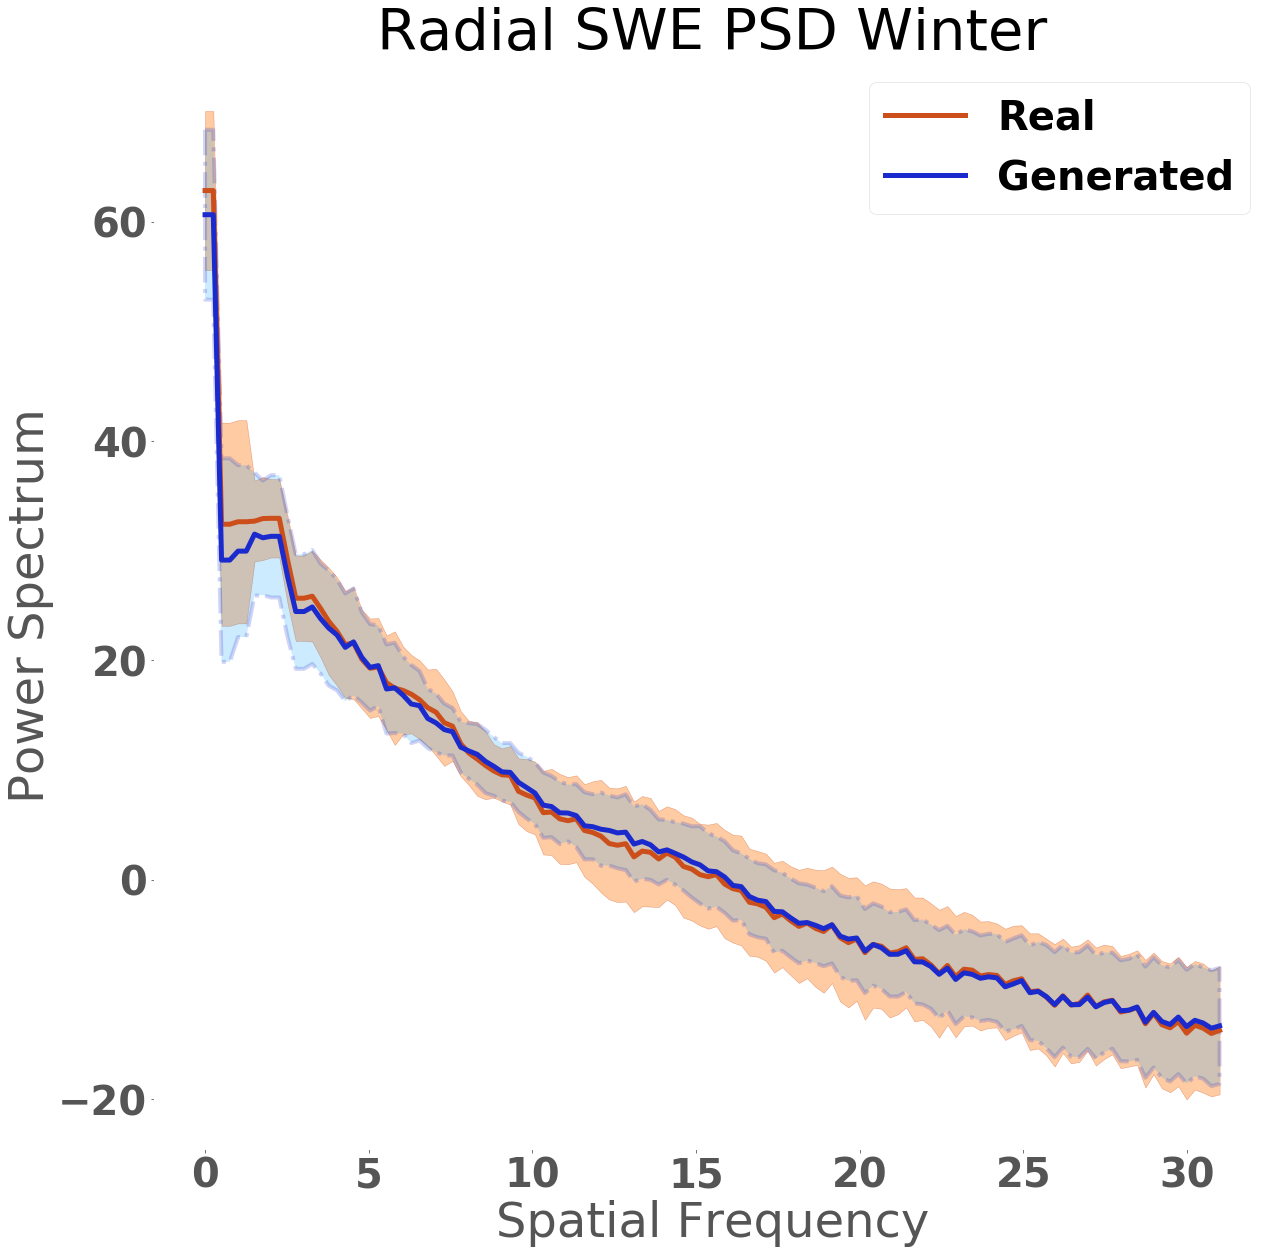

0
0


Text(0, 0.5, 'Power Spectrum')

<Figure size 432x288 with 0 Axes>

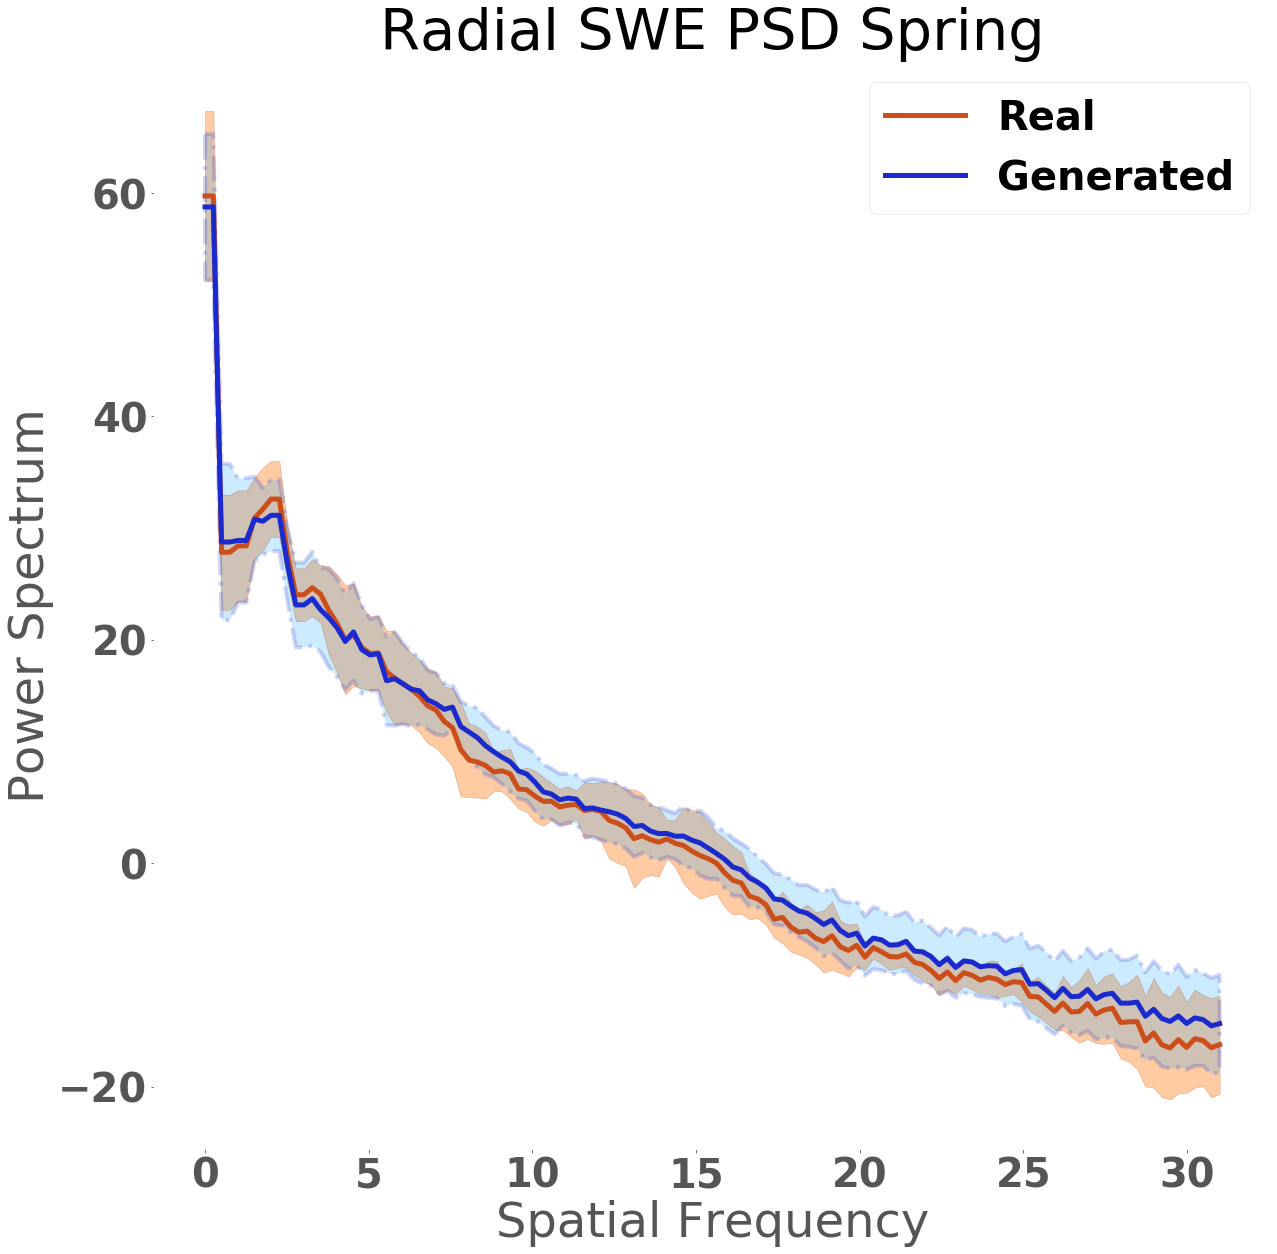

(array([  3.,   5.,  25.,  37., 104.,  91., 129., 105., 111., 194.]),
 array([33.01355056, 36.69713499, 40.38071942, 44.06430384, 47.74788827,
        51.4314727 , 55.11505713, 58.79864156, 62.48222599, 66.16581042,
        69.84939485]),
 <a list of 10 Patch objects>)

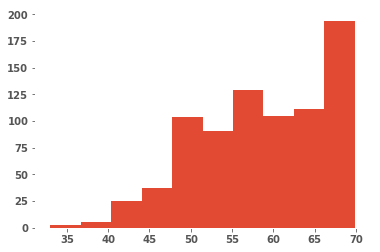

In [112]:
plt.hist(radial_means_fake[:,0])

(array([ 13.,   9.,  10.,   2.,   6.,  22.,  79.,  64., 187., 412.]),
 array([34.45924612, 37.99757936, 41.53591261, 45.07424586, 48.6125791 ,
        52.15091235, 55.68924559, 59.22757884, 62.76591209, 66.30424533,
        69.84257858]),
 <a list of 10 Patch objects>)

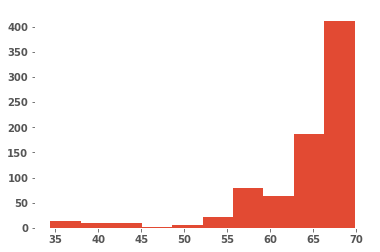

In [113]:
plt.hist(radial_means_real[:,0])

In [118]:
def plot_slices_histogram(radial_means_real, radial_means_fake):
    f = plt.figure(figsize=(180,10))
    f.patch.set_facecolor('white')
    
    
    gs = gridspec.GridSpec(1, 18)
    
    for index in range(0, 180, 10):
        ax = plt.subplot(gs[0, index//10])
        range_min = min(np.min(radial_means_real[:,index]), np.min(radial_means_fake[:, index]))
        range_max = max(np.max(radial_means_real[:,index]), np.max(radial_means_fake[:, index]))
        hist_dat_real = np.histogram(radial_means_real[:,index], 30, (range_min, range_max))
        hist_dat_fake = np.histogram(radial_means_fake[:,index], 30, (range_min, range_max))
        ax.plot(hist_dat_real[1][1:], hist_dat_real[0], linestyle = '--', c = '0.0', marker='s',  linewidth=3.0, label = 'Real Data')
        ax.plot(hist_dat_fake[1][1:], hist_dat_fake[0], marker = 'o', c = 'g', linewidth = 1.0, label = 'Generated Data')
        ax.legend(loc='upper left')
        freqs = np.linspace(0, 45.254833995939045, 180)
        title = "Histogram of pixel values " + str(freqs[index])
        ax.set_title(title)
        ax.set_ylabel('Counts')
        ax.set_xlabel('Density Values at frequency ' + str(freqs[index]))

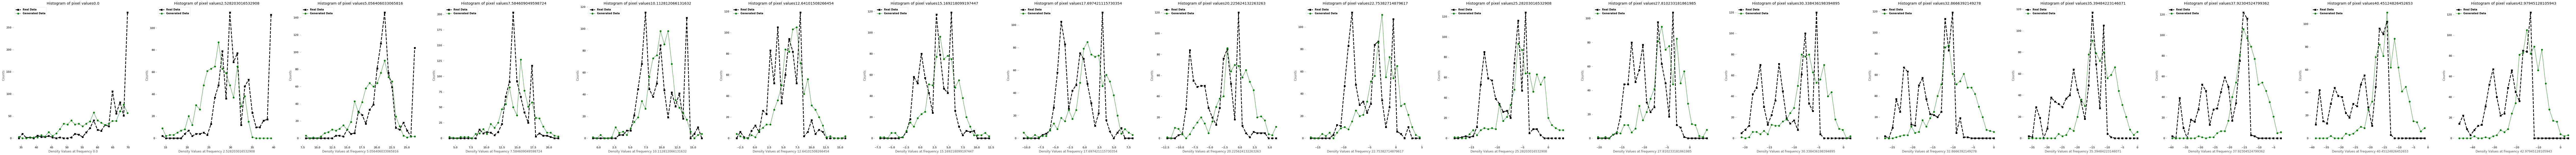

In [119]:
plot_slices_histogram(radial_means_real, radial_means_fake)

In [ ]:
nov = 400

In [ ]:
apr = 530

In [ ]:
aug = 300

In [ ]:
psd_stds_real

In [ ]:
fake, real = give_data_random(data_A, data_B, apr)

In [36]:
import cv2

In [40]:
index = 20

range_min = min(np.min(radial_means_real[:,index]), np.min(radial_means_fake[:, index]))
range_max = max(np.max(radial_means_real[:,index]), np.max(radial_means_fake[:, index]))
hist_dat_real = np.histogram(radial_means_real[:,index], 30, (range_min, range_max))
hist_dat_fake = np.histogram(radial_means_fake[:,index], 30, (range_min, range_max))

In [68]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1[0], hist_2[0])
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2[0]))
    return intersection

In [71]:
return_intersection(hist_dat_real, hist_dat_fake)

0.6902985074626866

In [73]:
np_hist_to_cv(hist_dat_real)

array([  0.,   0.,   0.,   0.,   0.,   1.,   4.,   2.,   3.,   5.,   3.,
        25.,  29.,  23.,  17.,  20.,  32.,  47.,  92.,  82., 125.,  78.,
        55.,  15.,  12.,   8.,  14.,   7.,   7.,  98.], dtype=float32)

In [37]:
OPENCV_METHODS = (("Correlation", cv2.HISTCMP_CORREL), ("Chi-Squared", cv2.HISTCMP_CHISQR), ("Intersection", cv2.HISTCMP_INTERSECT), ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))

In [91]:
for i in range(0, 6):
    print(cv2.compareHist(np_hist_to_cv(hist_dat_real), np_hist_to_cv(hist_dat_fake), i))

0.665139200083673
742.3591434108304
555.0
0.34035664932431126
535.6276358375906
777.7852759751111


In [88]:
OPENCV_METHODS

(('Correlation', 0), ('Chi-Squared', 1), ('Intersection', 2), ('Hellinger', 3))

In [ ]:
def np_hist_to_cv(np_histogram_output):
    counts, bin_edges = np_histogram_output
    return counts.ravel().astype('float32')

In [92]:
def log_metrics_np_hist(np_hist_real, np_hist_fake, name, writer, step):
    OPENCV_METHODS = (("Correlation", cv2.HISTCMP_CORREL), ("Chi-Squared", cv2.HISTCMP_CHISQR), ("Intersection", cv2.HISTCMP_INTERSECT), ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
    cv_hist_real = np_hist_to_cv(np_hist_real)
    cv_hist_fake = np_hist_to_cv(np_hist_fake)
    for option in OPENCV_METHODS:
        temp_name = name + " " + option[0]
        writer.add_scalar(temp_name, cv2.compareHist(cv_hist_real, cv_hist_fake, option[1]), step)
    

tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        ...,
        [-1.0000, -1.0000, -1.0000,  ..., -0.4928, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -0.6436, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -0.4435, -1.0000, -1.0000]])

In [26]:
fake.shape

torch.Size([400, 1, 64, 64])

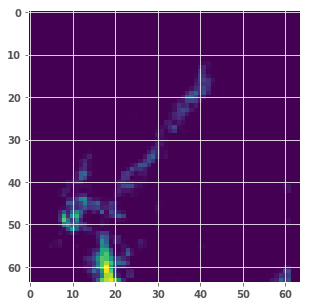

In [37]:
plt.imshow(np.abs(fake[0,0,:,:].detach().numpy() - real[0,0,:,:].numpy()))

In [36]:
np.abs(fake[2,0,:,:].detach().numpy() - real[2,0,:,:].numpy()).max()

1.2022682

In [15]:
def im_corr(im1, im2):
    #return circular correlation of images 1 and 2:
    if im1.shape != im2.shape:
        print("arrays need to have same shape")
        return None
    corrmat = np.zeros(im1.shape)    
    top = np.concatenate((np.zeros(im2.shape), np.zeros(im2.shape)), axis=1)
    bottom = np.concatenate((im2, np.zeros(im2.shape)), axis = 1)
    
    shiftmat = np.concatenate((top, bottom))
    
    
    corrmat = sp.signal.convolve(im1, shiftmat, 'same')
    corrmat = np.zeros(im1.shape)
    variogram_data = []
    lengths = []
    for x_shift in range(im1.shape[0]):
        for y_shift in range(im1.shape[1]):
            lengths.append(np.sqrt(x_shift**2 + y_shift**2))
            variogram_data.append()
            
    return (corrmat - np.min(corrmat))/(np.max(corrmat) - np.min(corrmat))

In [110]:
def take_radial_slice_sum(image, radius, distances):
    return image[(distances >= radius-.5) & (distances  < radius+.5)].sum()

def take_radial_slice_mean(image, radius, distances):
    return image[(distances >= radius-.5) & (distances  < radius+.5)].mean()

In [140]:
def spatial_variogram(im1, im2):
    im1 = (im1 - im1.mean())/im1.var()
    im2 = (im2 - im2.mean())/im2.var()

    var_mat = np.zeros(im1.shape)
    num_mat = np.zeros(im1.shape)
    
    
    var_mat = sp.signal.convolve(im1, im2, 'same')
    for x_shift in range(im1.shape[0]):
        for y_shift in range(im1.shape[1]):
            var_mat[x_shift, y_shift] = ((im1[:im1.shape[0] - x_shift, :im1.shape[1] - y_shift] - im2[x_shift:, y_shift:])**2).sum()
            num_mat[x_shift, y_shift] = im2[x_shift:, y_shift:].size
            
    x,y = np.meshgrid(np.arange(im1.shape[1]),np.arange(im1.shape[1]))
    R = np.sqrt(x**2 + y**2)
    r  = np.linspace(0,int(np.max(R)), num = int(np.max(R)))
    
    means = []
    num_elems = []
    # plot it
    for dist in r:
        #print(dist)
        means.append(take_radial_slice_sum(var_mat, dist, R))
        num_elems.append(take_radial_slice_sum(num_mat, dist, R))
        
    
    
    return np.array(means), np.array(num_elems)

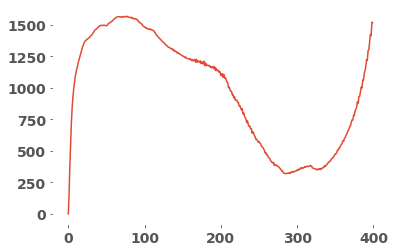

In [161]:
temp_vars, temp_elems = spatial_variogram(im2[:,:,0], im2[:,:,0])
plt.plot((temp_vars/(2*temp_elems))[0:400])

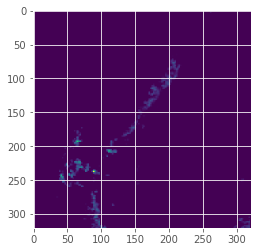

In [151]:
plt.imshow(im2[:,:,0])

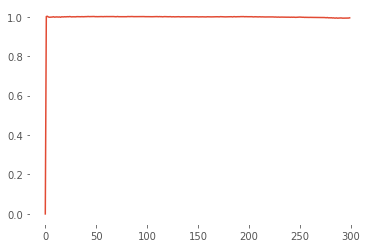

In [152]:
temp_rand_im = np.random.randn(321, 321)
temp_vars, temp_elems = spatial_variogram(temp_rand_im, temp_rand_im)
plt.plot((temp_vars/(2*temp_elems))[0:400])

In [ ]:
def take_two_weeks(input_data, start_date):
    return input_data[start_date:start_date + 14, :, :, :]

In [158]:
def kge(start_date, inputA, inputB):
    fakeB = model(torch.from_numpy(arr_to_input(take_two_weeks(inputA, start_date))[:,:,:,:]).cuda()).detach().cpu().numpy()
    realB = torch.from_numpy(arr_to_input(take_two_weeks(inputB, start_date))).numpy()
    
    xbar = np.mean(fakeB, axis=0)
    ybar = np.mean(realB, axis=0)
    xSTDev = np.std(fakeB, axis=0)
    ySTDev = np.std(realB, axis=0)
    r = np.mean(((fakeB - xbar)/(xSTDev)) * ((realB - ybar)/(ySTDev)), axis = 0)
    
    KGE = 1 - np.sqrt((r - 1)**2 + (xbar/ybar - 1)**2 + (xSTDev/ySTDev - 1)**2)
    return KGE

In [174]:
kge_vals = kge(400, data_A, data_B)
kge_vals = np.nan_to_num(kge_vals)[0,:,:]

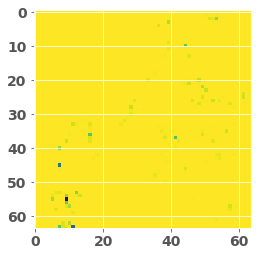

In [187]:
plt.imshow(kge_vals)


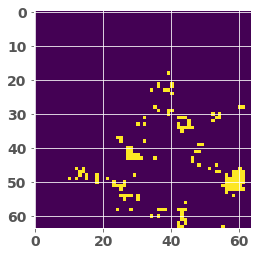

In [190]:
plt.imshow(kge_vals > 0.5)
